# Analysis of Conditions contributing to COVID-19 Deaths from years 2020-2023
This dataset shows us the total number of people that have died from various reasons from 2020 to 2023 in the United States and its regions. This was the time when COVID-19 started and we are using this dataset to evaluate and analyze the impact of COVID-19 alongside other health conditions in the United States.
##Motivation and Report Summary:
We aim to assess the regions and demographic age groups most susceptible to COVID-19-related mortality, allowing us to strategically allocate our vaccination resources to target these high-risk areas. This is done due to the countless people who suffered from this disease and we aim to help organizations better understand this data to make better public health decisions.
###Data Source:
Center for Disease Control and Prevention.
Link to access the data source is provided below.
https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-Sex-and-Age/9bhg-hcku

Each row represents a time period (months/years) when deaths occured and tells us whether those deaths were from COVID-19, Influenza, Pneumonia, or any other reason.


* Date As of: Date data was collected
* Start Date: Date data collection for the row started
* End Date: Date Data collection for the row ended
* Group: Data grouped by (Year, Month, Total)
* Year: Year (2020, 2021, 2022, 2023)
* Month
* State
* Age Group
* COVID-19 Deaths
* Total Deaths
* Pneumonia Deaths
* Pneumonia and Covid-19 Deaths
* Influenza Deaths
* Pneumonia, Influenza and COVID-19 Deaths
* Footnotes

###In this project, we are:
* Analyzing the total number of deaths per state in US categorized by year.
* Evaluating and determining the trend of COVID-19 deaths against the total number of deaths.
* Determining how COVID-19 deaths are distributed amoung different age groups and which age group is more susceptible to COVID-19 more than others thereby highlighting those in need of special care and attention.
* Comparing the COVID-19 deaths with deaths due to other conditions alongside COVID-19 for each given year.
* Comparing the COVID-19 Deaths by Sex for each year.

We will be using Pandas, NumPy, Matplotlib and Seaborn to make our plots and visualizations to showcase the data.
##Basic Information
Dataset has
* 16 Columns
* 133700 Rows


# Data Preparation
Importing necessary libraries and mounting Colab to Google Drive

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [54]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [55]:
data_path='/content/gdrive/MyDrive/BU-Fall/BA780-Project/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv'

In [56]:
deaths = pd.read_csv(data_path)
deaths.shape

(137700, 16)

In [57]:
deaths.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443.0,12243921.0,1159433.0,568733.0,22198.0,1755856.0,NaN
1,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,72811.0,1050.0,95.0,64.0,1535.0,NaN
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695.0,130217.0,2948.0,424.0,509.0,4702.0,NaN
3,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,1-4 years,284.0,14222.0,688.0,66.0,177.0,1074.0,NaN
4,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,21885.0,815.0,143.0,219.0,1387.0,NaN


In [58]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137700 entries, 0 to 137699
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data As Of                                137700 non-null  object 
 1   Start Date                                137700 non-null  object 
 2   End Date                                  137700 non-null  object 
 3   Group                                     137700 non-null  object 
 4   Year                                      134946 non-null  float64
 5   Month                                     123930 non-null  float64
 6   State                                     137700 non-null  object 
 7   Sex                                       137700 non-null  object 
 8   Age Group                                 137700 non-null  object 
 9   COVID-19 Deaths                           98356 non-null   float64
 10  Total Deaths        

#1. Data Cleaning
#####Here we clean our data by dropping the 'Footnotes' column as it is surplus to our requirements. We also filter and remove overlapping age groups and fill null values in all deaths columns with zeros. We do this since we cannot drop null values in columns as it would make the data skewed.

We also convert float values to int and add in two new columns that would help with our visualizations.



In [59]:
# Drop the useless 'Footnote' column
deaths.drop('Footnote',axis=1,inplace=True)

In [60]:
# Filter the overlapping age groups
cleaning_1 = deaths[(deaths['Age Group']=='1-4 years')|(deaths['Age Group']=='15-24 years')
|(deaths['Age Group']=='25-34 years')|(deaths['Age Group']=='35-44 years')|(deaths['Age Group']=='45-54 years')
|(deaths['Age Group']=='5-14 years')|(deaths['Age Group']=='55-64 years')|(deaths['Age Group']=='Under 1 year')]

In [61]:
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443.0,12243921.0,1159433.0,568733.0,22198.0,1755856.0
1,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,72811.0,1050.0,95.0,64.0,1535.0
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695.0,130217.0,2948.0,424.0,509.0,4702.0
3,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,1-4 years,284.0,14222.0,688.0,66.0,177.0,1074.0
4,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,21885.0,815.0,143.0,219.0,1387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,NaN,44.0,NaN,NaN,0.0,NaN
137696,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,55-64 years,0.0,38.0,NaN,0.0,0.0,NaN
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0.0,58.0,NaN,0.0,0.0,NaN
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,NaN,115.0,22.0,NaN,0.0,24.0


In [62]:
# Drop the overlapping age groups
deaths.drop(cleaning_1.index,axis=0,inplace=True)

In [63]:
# Fill the missing values
fill_values = {'COVID-19 Deaths': 0, 'Total Deaths': 0, 'Pneumonia Deaths': 0,
        'Pneumonia and COVID-19 Deaths': 0, 'Influenza Deaths': 0,
        'Pneumonia, Influenza, or COVID-19 Deaths': 0}
deaths.fillna(fill_values, inplace=True)

In [64]:
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443.0,12243921.0,1159433.0,568733.0,22198.0,1755856.0
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695.0,130217.0,2948.0,424.0,509.0,4702.0
6,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025.0,230187.0,7020.0,3160.0,328.0,11184.0
8,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870.0,346229.0,18346.0,9761.0,643.0,29053.0
10,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234.0,508822.0,41012.0,24063.0,999.0,64057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137693,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0.0,0.0,0.0,0.0,0.0,0.0
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0.0,44.0,0.0,0.0,0.0,0.0
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0.0,58.0,0.0,0.0,0.0,0.0
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0.0,115.0,22.0,0.0,0.0,24.0


In [65]:
# Add Pneumonia only and covid only deaths to the list
deaths['Pneumonia Only'] = deaths.apply(lambda column: column['Pneumonia Deaths'] - column['Pneumonia and COVID-19 Deaths'], axis=1)
deaths['Only Covid19 Deaths']= deaths.apply(lambda column: column['COVID-19 Deaths'] - column['Pneumonia and COVID-19 Deaths'], axis=1)
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443.0,12243921.0,1159433.0,568733.0,22198.0,1755856.0,590700.0,576710.0
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695.0,130217.0,2948.0,424.0,509.0,4702.0,2524.0,1271.0
6,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025.0,230187.0,7020.0,3160.0,328.0,11184.0,3860.0,3865.0
8,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870.0,346229.0,18346.0,9761.0,643.0,29053.0,8585.0,10109.0
10,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234.0,508822.0,41012.0,24063.0,999.0,64057.0,16949.0,22171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137693,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0.0,115.0,22.0,0.0,0.0,24.0,22.0,0.0


In [66]:
# Convert the death values to integers
deaths['COVID-19 Deaths'] = deaths['COVID-19 Deaths'].astype(int)
deaths['Total Deaths'] = deaths['Total Deaths'].astype(int)
deaths['Pneumonia Deaths'] = deaths['Pneumonia Deaths'].astype(int)
deaths['Pneumonia and COVID-19 Deaths'] = deaths['Pneumonia and COVID-19 Deaths'].astype(int)
deaths['Influenza Deaths'] = deaths['Influenza Deaths'].astype(int)
deaths['Pneumonia, Influenza, or COVID-19 Deaths'] = deaths['Pneumonia, Influenza, or COVID-19 Deaths'].astype(int)
deaths['Pneumonia Only'] = deaths['Pneumonia Only'].astype(int)
deaths['Only Covid19 Deaths'] = deaths['Only Covid19 Deaths'].astype(int)
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443,12243921,1159433,568733,22198,1755856,590700,576710
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695,130217,2948,424,509,4702,2524,1271
6,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025,230187,7020,3160,328,11184,3860,3865
8,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870,346229,18346,9761,643,29053,8585,10109
10,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234,508822,41012,24063,999,64057,16949,22171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137693,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0,0,0,0,0,0,0,0
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0,44,0,0,0,0,0,0
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0,58,0,0,0,0,0,0
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0,115,22,0,0,24,22,0


#2. Visualizations



## Question 1: Is there a different ratio of males and females who died from COVID-19?.
#### Bar Chart showing male deaths and comparing them with female deaths
Here we are showing the trend of total COVID-19 deaths per year based on sex. This visualizes the deaths of male population and compares it to the deaths with the female population.


In [67]:
deaths_per_year = deaths[(deaths['State'] == "United States") & (deaths['Group'] == "By Year") & (deaths["Age Group"] == "All Ages")]
deaths_per_year

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths
2754,9/20/23,1/1/20,12/31/20,By Year,2020.0,NaN,United States,All Sexes,All Ages,385666,3390039,352010,180086,8787,565226,171924,205580
2771,9/20/23,1/1/20,12/31/20,By Year,2020.0,NaN,United States,Male,All Ages,209481,1774408,195512,103323,4545,305504,92189,106158
2788,9/20/23,1/1/20,12/31/20,By Year,2020.0,NaN,United States,Female,All Ages,176185,1615631,156498,76763,4242,259722,79735,99422
2805,9/20/23,1/1/21,12/31/21,By Year,2021.0,NaN,United States,All Sexes,All Ages,463263,3471767,412006,259613,1092,616475,152393,203650
2822,9/20/23,1/1/21,12/31/21,By Year,2021.0,NaN,United States,Male,All Ages,260210,1843487,232698,149565,555,343749,83133,110645
2839,9/20/23,1/1/21,12/31/21,By Year,2021.0,NaN,United States,Female,All Ages,203053,1628280,179308,110048,537,272726,69260,93005
2856,9/20/23,1/1/22,12/31/22,By Year,2022.0,NaN,United States,All Sexes,All Ages,246161,3288942,267652,110393,8751,411412,157259,135768
2873,9/20/23,1/1/22,12/31/22,By Year,2022.0,NaN,United States,Male,All Ages,133452,1725909,147005,62742,4065,221400,84263,70710
2890,9/20/23,1/1/22,12/31/22,By Year,2022.0,NaN,United States,Female,All Ages,112709,1563033,120647,47651,4686,190012,72996,65058
2907,9/20/23,1/1/23,9/16/23,By Year,2023.0,NaN,United States,All Sexes,All Ages,50353,2093173,127765,18641,3568,162743,109124,31712


In [68]:
deaths_per_year.drop(['Month', 'Total Deaths', 'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths'], axis=1)

,Data As Of,Start Date,End Date,Group,Year,State,Sex,Age Group,COVID-19 Deaths,Pneumonia Only,Only Covid19 Deaths
2754,9/20/23,1/1/20,12/31/20,By Year,2020.0,United States,All Sexes,All Ages,385666,171924,205580
2771,9/20/23,1/1/20,12/31/20,By Year,2020.0,United States,Male,All Ages,209481,92189,106158
2788,9/20/23,1/1/20,12/31/20,By Year,2020.0,United States,Female,All Ages,176185,79735,99422
2805,9/20/23,1/1/21,12/31/21,By Year,2021.0,United States,All Sexes,All Ages,463263,152393,203650
2822,9/20/23,1/1/21,12/31/21,By Year,2021.0,United States,Male,All Ages,260210,83133,110645
2839,9/20/23,1/1/21,12/31/21,By Year,2021.0,United States,Female,All Ages,203053,69260,93005
2856,9/20/23,1/1/22,12/31/22,By Year,2022.0,United States,All Sexes,All Ages,246161,157259,135768
2873,9/20/23,1/1/22,12/31/22,By Year,2022.0,United States,Male,All Ages,133452,84263,70710
2890,9/20/23,1/1/22,12/31/22,By Year,2022.0,United States,Female,All Ages,112709,72996,65058
2907,9/20/23,1/1/23,9/16/23,By Year,2023.0,United States,All Sexes,All Ages,50353,109124,31712


In [69]:
deaths_per_year['Year'] = deaths_per_year['Year'].astype(int)

<ipython-input-69-ed53f2a21b49>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
deaths_per_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2754 to 2941
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data As Of                                12 non-null     object 
 1   Start Date                                12 non-null     object 
 2   End Date                                  12 non-null     object 
 3   Group                                     12 non-null     object 
 4   Year                                      12 non-null     int64  
 5   Month                                     0 non-null      float64
 6   State                                     12 non-null     object 
 7   Sex                                       12 non-null     object 
 8   Age Group                                 12 non-null     object 
 9   COVID-19 Deaths                           12 non-null     int64  
 10  Total Deaths                       

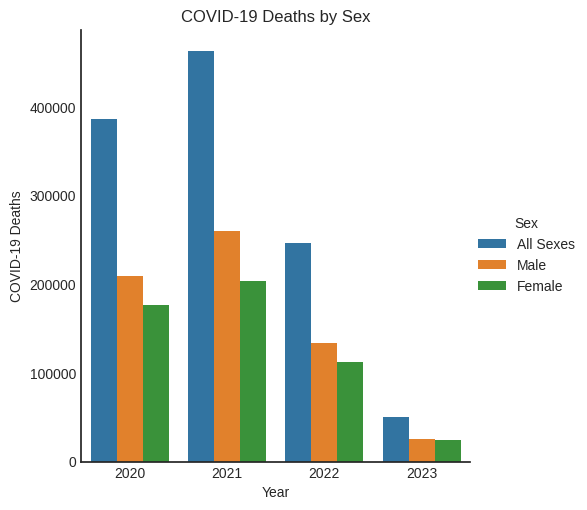

In [71]:
sns.catplot(y = 'COVID-19 Deaths', x = 'Year', hue="Sex", data=deaths_per_year, kind='bar').set(title="COVID-19 Deaths by Sex")
plt.show()

####  Summary:
Here we are showing the trend of COVID-19 deaths for all 4 years as well as total deaths for all four years. This shows us that there were more male deaths than female deaths and that the overall trend decreased for each year. This could be due to increased vaccinations or better immunity.


## Question 2: What is the trend of people who died of COVID-19 over the total time period and how does that impacts the overall death trend?

####Line Chart showing trend of COVID-19 Deaths and total deaths

In [72]:
# Construct a DataFrame that exclusively includes the columns required for the line chart
line_2 = deaths[['Group','Year','Month','State','Sex','Age Group','COVID-19 Deaths','Total Deaths']]
line_2

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths
0,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443,12243921
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695,130217
6,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025,230187
8,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870,346229
10,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234,508822
...,...,...,...,...,...,...,...,...
137693,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0,0
137695,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0,44
137697,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0,58
137698,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0,115


In [73]:
# Filter to get the rows required for the line chart
line_2 = line_2[(line_2['Group']=='By Month') & (line_2['State']=='United States') &
                (line_2['Sex']=='All Sexes') & (line_2['Age Group']=='All Ages')]
line_2

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths
13770,By Month,2020.0,1.0,United States,All Sexes,All Ages,6,264677
13821,By Month,2020.0,2.0,United States,All Sexes,All Ages,25,244951
13872,By Month,2020.0,3.0,United States,All Sexes,All Ages,7174,269807
13923,By Month,2020.0,4.0,United States,All Sexes,All Ages,65550,322414
13974,By Month,2020.0,5.0,United States,All Sexes,All Ages,38329,280562
14025,By Month,2020.0,6.0,United States,All Sexes,All Ages,18026,250441
14076,By Month,2020.0,7.0,United States,All Sexes,All Ages,31135,279008
14127,By Month,2020.0,8.0,United States,All Sexes,All Ages,29911,277288
14178,By Month,2020.0,9.0,United States,All Sexes,All Ages,19158,257191
14229,By Month,2020.0,10.0,United States,All Sexes,All Ages,24930,273912


In [74]:
# Construct DataFrames of 'COVID-19 Deaths' and 'Total Deaths'
covid_deaths = line_2[['Year','Month','COVID-19 Deaths']]
total_deaths = line_2[['Year','Month','Total Deaths']]

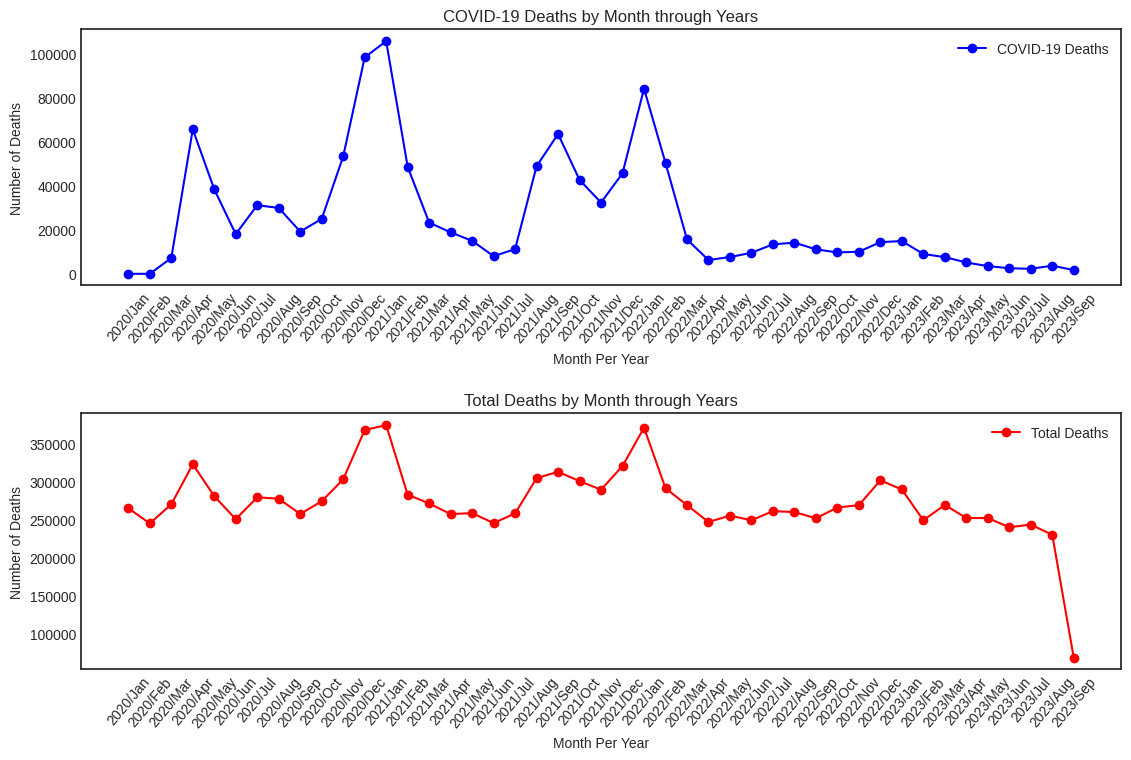

In [77]:
# Create canvas
fig, axs = plt.subplots(2,1,figsize=(13,8))

# Create labels for x-axis
years = ['2020','2021','2022','2023']
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
lst = []

for i in range(len(years)):
  for j in range(len(month_labels)):
    lst.append(years[i]+'/'+month_labels[j])

new_lst = lst[:-3]

# Create a line chart for COVID-19 Deaths
axs[0].plot(range(45),covid_deaths['COVID-19 Deaths'],'-b',label='COVID-19 Deaths',marker='o')
axs[0].set_xticks(range(45))
axs[0].set_xticklabels(new_lst,rotation=50)
axs[0].set_title('COVID-19 Deaths by Month through Years')
axs[0].set_xlabel('Month Per Year')
axs[0].set_ylabel('Number of Deaths')
axs[0].legend()

# Create a line chart for total deaths
axs[1].plot(range(45),total_deaths['Total Deaths'],'-r',label='Total Deaths',marker='o')
axs[1].set_xticks(range(45))
axs[1].set_xticklabels(new_lst,rotation=50)
axs[1].set_title('Total Deaths by Month through Years')
axs[1].set_xlabel('Month Per Year')
axs[1].set_ylabel('Number of Deaths')
axs[1].legend()

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
plt.show()

####Summary:
The two charts above depict variations in COVID-19 deaths and total death counts for different years. Through time series analysis, we can observe that the trends in COVID-19 deaths and total deaths were highly similar in 2020, 2021, and 2022, indicating a significant impact of COVID-19 deaths on the total death count. However, in 2023, there is a notable divergence in the trends. With COVID-19 deaths continuing to decrease, this suggests that in 2023, the threat of COVID-19 is gradually diminishing, leading to a corresponding reduction in its impact on the total death count.

## Question 3: Which age group is more susceptible to death by COVID-19?
####Stacked Bar chart showing percentage of deaths for each age group

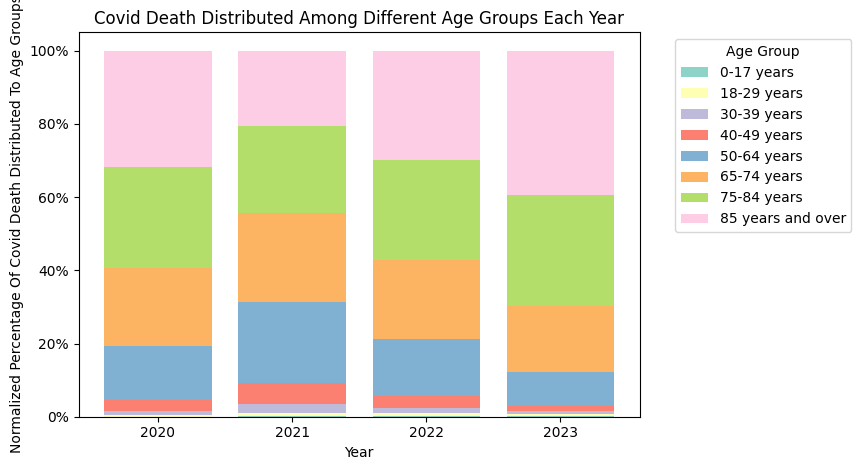

In [24]:
deaths_ages = deaths[(deaths['Group']=='By Year') & (deaths['Age Group']!='All Ages') &
                     (deaths['Sex']=='All Sexes') & (deaths['State']=='United States')][['Year','Age Group','COVID-19 Deaths']]
years = deaths_ages['Year'].unique()
group1 = deaths_ages[deaths_ages['Age Group']=='0-17 years']['COVID-19 Deaths'].reset_index(drop=True)
group2 = deaths_ages[deaths_ages['Age Group']=='18-29 years']['COVID-19 Deaths'].reset_index(drop=True)
group3 = deaths_ages[deaths_ages['Age Group']=='30-39 years']['COVID-19 Deaths'].reset_index(drop=True)
group4 = deaths_ages[deaths_ages['Age Group']=='40-49 years']['COVID-19 Deaths'].reset_index(drop=True)
group5 = deaths_ages[deaths_ages['Age Group']=='50-64 years']['COVID-19 Deaths'].reset_index(drop=True)
group6 = deaths_ages[deaths_ages['Age Group']=='65-74 years']['COVID-19 Deaths'].reset_index(drop=True)
group7 = deaths_ages[deaths_ages['Age Group']=='75-84 years']['COVID-19 Deaths'].reset_index(drop=True)
group8 = deaths_ages[deaths_ages['Age Group']=='85 years and over']['COVID-19 Deaths'].reset_index(drop=True)
total = [group1[i] + group2[i] + group3[i] + group4[i] + group5[i] + group6[i] + group7[i] + group8[i] for i in range(len(years))]
group1_p = np.array([group1[i] / total[i] for i in range(len(years))])
group2_p = np.array([group2[i] / total[i] for i in range(len(years))])
group3_p = np.array([group3[i] / total[i] for i in range(len(years))])
group4_p = np.array([group4[i] / total[i] for i in range(len(years))])
group5_p = np.array([group5[i] / total[i] for i in range(len(years))])
group6_p = np.array([group6[i] / total[i] for i in range(len(years))])
group7_p = np.array([group7[i] / total[i] for i in range(len(years))])
group8_p = np.array([group8[i] / total[i] for i in range(len(years))])

cmap = plt.get_cmap("Set3")
colors = cmap(range(8))

ages = deaths_ages['Age Group'].unique()
plt.bar(years, group1_p, label='0-17 years', color=colors[0])
plt.bar(years, group2_p, bottom=group1_p, label='18-29 years', color=colors[1])
plt.bar(years, group3_p, bottom=group1_p+group2_p, label='30-39 years', color=colors[2])
plt.bar(years, group4_p, bottom=group1_p+group2_p+group3_p, label='40-49 years', color=colors[3])
plt.bar(years, group5_p, bottom=group1_p+group2_p+group3_p+group4_p, label='50-64 years', color=colors[4])
plt.bar(years, group6_p, bottom=group1_p+group2_p+group3_p+group4_p+group5_p, label='65-74 years', color=colors[5])
plt.bar(years, group7_p, bottom=group1_p+group2_p+group3_p+group4_p+group5_p+group6_p, label='75-84 years', color=colors[6])
plt.bar(years, group8_p, bottom=group1_p+group2_p+group3_p+group4_p+group5_p+group6_p+group7_p, label='85 years and over', color=colors[7])
plt.xticks(years)
plt.title('Covid Death Distributed Among Different Age Groups Each Year')
plt.xlabel('Year')

def percentage_formatter(x, pos):
    return '{:.0%}'.format(x)

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.tight_layout()
plt.ylabel('Normalized Percentage Of Covid Death Distributed To Age Groups')
plt.legend(title = 'Age Group',loc='upper right',bbox_to_anchor=(1.39, 1))
plt.show()

#### Summary:
We want to determine how COVID-19 deaths are distributed among different age groups for each year. Therefore, we will know which age group is more susceptible to COVID-19 and how this distribution has changed over time. This graph tells us that older people are more susceptible to COVID-19 and thus efforts must be provided to them. This graphs tells us that a higher percentage of people die from COVID-19 who are older.
We reached this conclusion by first standardizing our data and then plotting it.

## Question 4: Are people more likely to die from COVID-19, or a combination of diseases in addition to COVID-19?
#### Bar Graph to compare the COVID-19 deaths with deaths due to other conditions alongside COVID-19 for each given year.

In [42]:
# Construct a DataFrame that exclusively includes the columns required for the graph
Covid_Pneumonia_deaths = deaths[['Group','Year','State','Sex', 'Age Group','Pneumonia and COVID-19 Deaths','COVID-19 Deaths','Pneumonia Only']]
Covid_Pneumonia_deaths


,Group,Year,State,Sex,Age Group,Pneumonia and COVID-19 Deaths,COVID-19 Deaths,Pneumonia Only
0,By Total,NaN,United States,All Sexes,All Ages,568733,1145443,590700
2,By Total,NaN,United States,All Sexes,0-17 years,424,1695,2524
6,By Total,NaN,United States,All Sexes,18-29 years,3160,7025,3860
8,By Total,NaN,United States,All Sexes,30-39 years,9761,19870,8585
10,By Total,NaN,United States,All Sexes,40-49 years,24063,46234,16949
...,...,...,...,...,...,...,...,...
137693,By Month,2023.0,Puerto Rico,Female,40-49 years,0,0,0
137695,By Month,2023.0,Puerto Rico,Female,50-64 years,0,0,0
137697,By Month,2023.0,Puerto Rico,Female,65-74 years,0,0,0
137698,By Month,2023.0,Puerto Rico,Female,75-84 years,0,0,22


In [43]:
Covid_Pneumonia_deaths= Covid_Pneumonia_deaths.loc[(Covid_Pneumonia_deaths['Group']== 'By Year') & (Covid_Pneumonia_deaths['State']== 'United States') & (Covid_Pneumonia_deaths['Sex'] == 'All Sexes') & (Covid_Pneumonia_deaths['Age Group'] == 'All Ages')].reset_index(drop=True)
Covid_Pneumonia_deaths['Year'] = Covid_Pneumonia_deaths['Year'].astype(int)
Covid_Pneumonia_deaths


,Group,Year,State,Sex,Age Group,Pneumonia and COVID-19 Deaths,COVID-19 Deaths,Pneumonia Only
0,By Year,2020,United States,All Sexes,All Ages,180086,385666,171924
1,By Year,2021,United States,All Sexes,All Ages,259613,463263,152393
2,By Year,2022,United States,All Sexes,All Ages,110393,246161,157259
3,By Year,2023,United States,All Sexes,All Ages,18641,50353,109124


<ipython-input-44-b7a06e00585e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


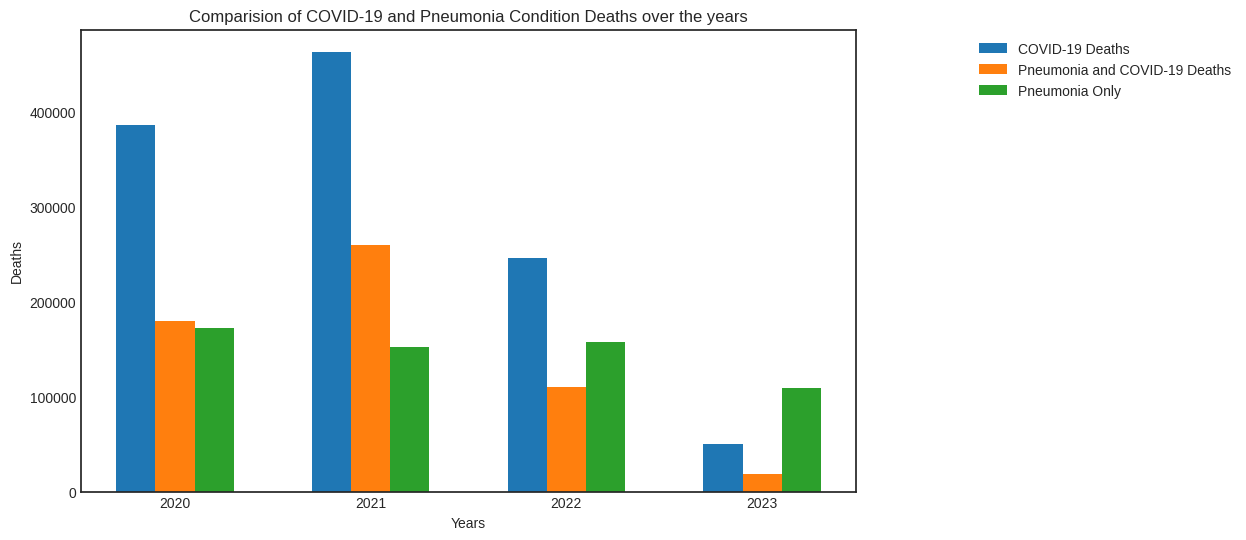

In [44]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
year_labels = ['2020','2021','2022','2023']
pneumonia_and_covid_deaths = Covid_Pneumonia_deaths ['Pneumonia and COVID-19 Deaths']
covid_deaths = Covid_Pneumonia_deaths ['COVID-19 Deaths']
pneumonia_only_deaths = Covid_Pneumonia_deaths ['Pneumonia Only']
x = Covid_Pneumonia_deaths['Year']
bar_width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))


plt.bar([i - 1 * bar_width for i in x], covid_deaths, width=bar_width, label='COVID-19 Deaths')
plt.bar(x, pneumonia_and_covid_deaths , width=bar_width, label='Pneumonia and COVID-19 Deaths')
plt.bar([i + 1 * bar_width for i in x], pneumonia_only_deaths, width=bar_width, label='Pneumonia Only')


ax.set_xlabel('Years')
ax.set_xticks(x)
ax.set_xticklabels(year_labels)
ax.set_ylabel('Deaths')
ax.set_title('Comparision of COVID-19 and Pneumonia Condition Deaths over the years')
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

#### Summary:
The graph shows us that during 2020 and 2021, deaths due to COVID-19 increased and the same case was true for deaths due to both pneumonia and COVID-19. After that, the trend decreased for both the graphs. The deaths due to only pneumonia stayed constant though, which showed that this is endemic to the United States, whereas COVID-19 is slowly fading due to better health and safety conditions.


During initital year of Covid, more than half of the population who had Pneumonia condition did not survive when came they came into contact with COVID-19. This increased rapidly and we can see that there was a severe impact of COVID-19 on people that had pneumonia during 2021 as well.

After that, however, there was a notable change in 2022. Population who passed away due to both pneumonia and covid dropped to less than half of the deaths due to pneumonia only.This trend continued in 2023 and the percentage has dropped to less than 25%. By this, we can see that the vaccinatins and improved healthcare measures have mitigated the impact of covid on pneumonia condition population over the years.


## Question 5: What is the COVID-19 death count for each state for each year?
####Geoplot for COVID-19 deaths for United States and its regions for each year

In [45]:
!pip install plotly_express -q
import plotly_express as px

In [46]:
map=deaths[['Group','Year','State','COVID-19 Deaths','Sex','Age Group']]

map.head()

,Group,Year,State,COVID-19 Deaths,Sex,Age Group
0,By Total,NaN,United States,1145443,All Sexes,All Ages
2,By Total,NaN,United States,1695,All Sexes,0-17 years
6,By Total,NaN,United States,7025,All Sexes,18-29 years
8,By Total,NaN,United States,19870,All Sexes,30-39 years
10,By Total,NaN,United States,46234,All Sexes,40-49 years


In [82]:
map=map.loc[(map['Group']== 'By Year') & (map['Sex'] == 'All Sexes') & (map['Age Group'] == 'All Ages') & (map['State'] != 'United States' ) & (map['State'] != 'Puerto Rico' )].reset_index(drop=True)
map['Year'] = map["Year"].astype(int)
map

,Group,Year,State,COVID-19 Deaths,Sex,Age Group,Code
0,By Year,2020,Alabama,6706,All Sexes,All Ages,AL
1,By Year,2021,Alabama,9719,All Sexes,All Ages,AL
2,By Year,2022,Alabama,4226,All Sexes,All Ages,AL
3,By Year,2023,Alabama,853,All Sexes,All Ages,AL
4,By Year,2020,Alaska,254,All Sexes,All Ages,AK
...,...,...,...,...,...,...,...
203,By Year,2023,Wisconsin,783,All Sexes,All Ages,WI
204,By Year,2020,Wyoming,461,All Sexes,All Ages,WY
205,By Year,2021,Wyoming,963,All Sexes,All Ages,WY
206,By Year,2022,Wyoming,353,All Sexes,All Ages,WY


In [83]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [84]:
map['Code']=map['State'].map(code)

In [85]:
map['COVID-19 Deaths'].max()

48787

In [86]:
fig = px.choropleth(map, locations="Code", locationmode='USA-states',color="COVID-19 Deaths", animation_frame="Year",hover_name="State",range_color=[0,50000],color_continuous_scale=
                    'spectral_r',scope='usa')
fig.update_layout(
    title= {'text':'Death of COVID-19 in each year in US States and DC(District of Columbia)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

# Use title as 50 states plus DC


https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html
https://medium.com/geekculture/create-a-choropleth-map-of-state-unemployment-rates-with-plotly-1354050e0cfd


####Summary:
Deaths due to COVID-19 in each year in US States and DC (District of Columbia): We plot a map to make a comparison about the death of COVID-19 in each year from 2020 to 2023 in each state. From the picture we can observe that in each year, Texas, California and Florida have much more deaths than other states. Among these four years, 2021 has the most deaths for all states. The states on the seaward sides have more deaths than the middle most times in general.

# 3. Conclusions:
Our data and visualizations tell us about the general death trend with regards to sex, age group for every year since COVID-19's first case. Identifying insights from this data will greatly help the local authorities in trying to mitigate further deaths by concentrating their efforts towards certain regions and for particular age groups.

Our data shows us that COVID-19 deaths were at their highest towards the end of 2020 and start of 2021 and then they started to decline. There were roughly the same deaths for male and female.

Our data also showed us that old people were more susceptible of dying from COVID-19 than other age groups which is why they should be practicing social distancing more strictly.

There were more deaths in California and Texas compared to other states which is why efforts for COVID-19 prevention should be concentrated in these regions.